# Regresja

Dane wykorzystywane w pierwszej części ćwiczeń pochodzą z materiałów do książki: [F. Nwanganga, M. Chapple: Praktyczne uczenie maszynowe w języku R]("https://www.wiley.com/en-ie/Practical+Machine+Learning+in+R-p-9781119591511").

## 1. Prosta regresja liniowa

### Wczytanie danych

Pobierz dane `bikes.csv` do swojego katalogu roboczego, a następnie wczytaj je. Użyj argumentu `col_types` żeby ustawić typ poszczególnych kolumn: `D` - data, `f` - faktor, `d` - double.

In [6]:
library(tidyverse)
rowery <- read_csv("./bikes.csv", col_types = "Dffffddddd")

Wyświetl podgląd danych za pomocą funkcji `glimpse()`

In [7]:
glimpse(rowery)

Rows: 731
Columns: 10
$ date        <date> 2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-0…
$ season      <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ holiday     <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ weekday     <fct> 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4…
$ weather     <fct> 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2…
$ temperature <dbl> 46.71653, 48.35024, 34.21239, 34.52000, 36.80056, 34.88784…
$ realfeel    <dbl> 46.39865, 45.22419, 25.70131, 28.40009, 30.43728, 30.90523…
$ humidity    <dbl> 0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261…
$ windspeed   <dbl> 6.679665, 10.347140, 10.337565, 6.673420, 7.780994, 3.7287…
$ rentals     <dbl> 985, 801, 1349, 1562, 1600, 1606, 1510, 959, 822, 1321, 12…


Wyświetl i przeanalizuj statystyki opisowe danych `rowery`.

In [8]:
summary(rowery)

      date            season  holiday weekday weather  temperature   
 Min.   :2011-01-01   1:181   0:710   6:105   2:247   Min.   :22.60  
 1st Qu.:2011-07-02   2:184   1: 21   0:105   1:463   1st Qu.:46.12  
 Median :2012-01-01   3:188           1:105   3: 21   Median :59.76  
 Mean   :2012-01-01   4:178           2:104           Mean   :59.51  
 3rd Qu.:2012-07-01                   3:104           3rd Qu.:73.05  
 Max.   :2012-12-31                   4:104           Max.   :90.50  
                                      5:104                          
    realfeel         humidity        windspeed          rentals    
 Min.   : 12.59   Min.   :0.0000   Min.   : 0.9322   Min.   :  22  
 1st Qu.: 43.34   1st Qu.:0.5200   1st Qu.: 5.6182   1st Qu.:3152  
 Median : 61.02   Median :0.6267   Median : 7.5343   Median :4548  
 Mean   : 59.55   Mean   :0.6279   Mean   : 7.9303   Mean   :4504  
 3rd Qu.: 75.50   3rd Qu.:0.7302   3rd Qu.: 9.7092   3rd Qu.:5956  
 Max.   :103.10   Max.   :0.9725

Narysuj wykresy punktowe porównujące `rentals` (liczbę wypożyczonych rowerów) do trzech innych zmiennych (`humidity`, `windspeed` oraz `temperature`). Co możesz powiedzieć na temat zależności między zmienną `rentals` a pozostałymi wybranymi zmiennymi na podstawie samych wykresów?


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




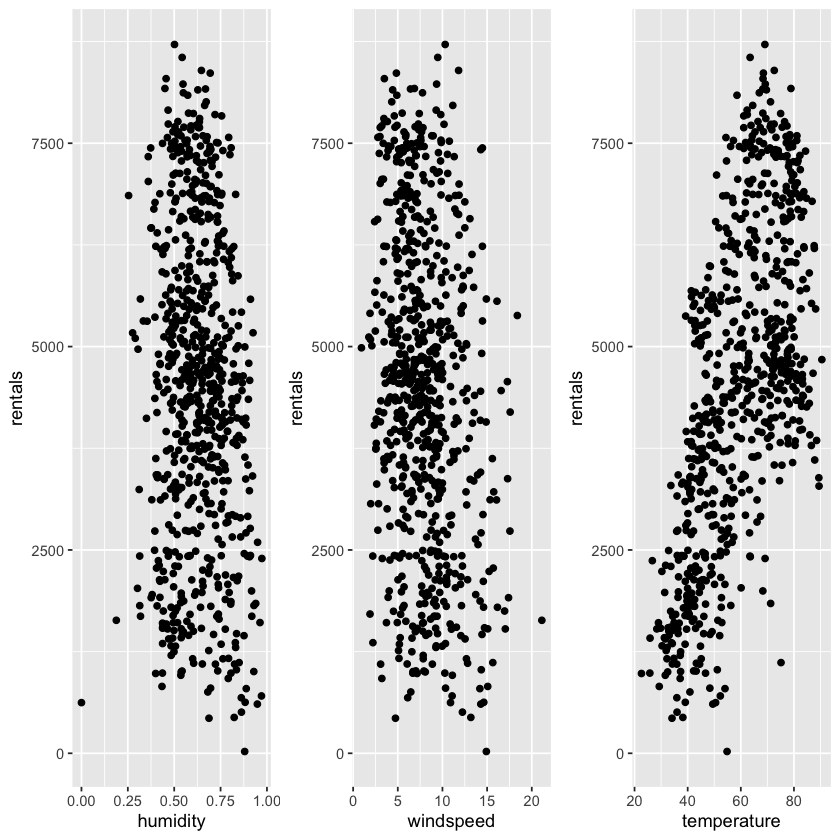

In [9]:
#library(ggplot2)

#df <- data.frame(x,y)
humid <- ggplot(data=rowery, aes(x=humidity, y=rentals)) + geom_point()
wind <-  ggplot(data=rowery, aes(x=windspeed, y=rentals)) + geom_point()
temp <-  ggplot(data=rowery, aes(x=temperature, y=rentals)) + geom_point()


library(gridExtra)
grid.arrange(humid, wind, temp, nrow=1, ncol=3)

### Korelacja

Oblicz współczynnik korelacji liniowej Pearsona pomiędzy zmiennymi `rentals` i `humidity`.

In [10]:
cov(rowery$rentals, rowery$humidity)

sd(rowery$rentals)
sd(rowery$humidity)

pearson <- cov(rowery$rentals, rowery$humidity) / 
  (sd(rowery$rentals) * sd(rowery$humidity))

pearson

[1] -27.77323

[1] 1937.211

[1] 0.1424291

[1] -0.1006586

Jaki wniosek można wyciągnąć na temat zależności pomiędzy badanymi zmiennymi na podstawie obliczonego współczynnika korelacji Pearsona?

Oblicz współczynnik korelacji Pearsona między zmienną `rentals` a zmiennymi `temperature` oraz `windspeed`, wykorzystując funkcję `cor()`.

In [11]:
cor(rowery$temperature, rowery$rentals)
cor(rowery$windspeed, rowery$rentals)

[1] 0.627494

[1] -0.234545

Na podstawie obliczonych współczynników korelacji odpowiedz na pytania:

- Czy istnieje jakaś zależność między liczbą wypożyczonych rowerów a pozostałymi zmiennymi?

- Jeśli istnieje zależność, to jak silna?

Oblicz tabelę współczynników korelacji dla  dla zmiennych liczbowych ze zbioru `rowery`. Następnie zwizualizuj korelacje za pomocą funkcji `corrplot`.

In [12]:
rowery_liczbowe <- rowery %>%
  select(-(date:weather))

rowery_korelacje <- cor(rowery_liczbowe)

library(corrplot)
corrplot(rowery_korelacje)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


Ponieważ korelacja między A i B jest taka sama, jak pomiędzy B i A, możemy uprościć wizualizację, pokazując tylko współczynniki nad przekątną - służy do tego argument `type` funkcji `corrplot()`. Ponadto za pomocą argumentu `method` możemy wyświetlić wartości współczynników zamiast kółek.

In [ ]:
corrplot(rowery_korelacje, type = "upper", method = "number")

### Współczynniki prostej regresji

Ręcznie uzyskaj wartość współczynników `b0` i `b1`.

In [ ]:
b1 <- cov(rowery$temperature, rowery$rentals) / var(rowery$temperature)
b1

b0 <- mean(rowery$rentals) - b1 * mean(rowery$temperature)
b0

### Model prostej regresji liniowej

Zbuduj model liniowy dla pary zmiennych `rentals` oraz `temperature`.

In [ ]:
rowery_model1 <- lm(data = rowery, rentals~temperature)
rowery_model1

Wyświetl bardziej szczegółowe informacje o modelu za pomocą funkcji `summary()`.

In [ ]:
summary(rowery_model1)

Co oznaczają statystyki podsumowujące dla reszt (sekcja `Residuals`)?

## 2. Wielokrotna regresja liniowa

Model uzyskany za pomocą pojedynczego predyktora (`temperature`) tłumaczył około 39% zmienności w zbiorze danych.  W kolejnym modelu uwzględnij dodatkowo zmienne `windspeed` oraz `humidity`.

In [ ]:
rowery_model2 <- lm(data = rowery, rentals~humidity+windspeed+temperature)

summary(rowery_model2)

Jak oceniasz nowo powstały model? 

Napisz równanie w jaki sposób `rentals` zależy od wybranych predyktorów.


## 3. Zadania

1. Pobierz i wczytaj zbiór danych `Advertising.csv`.

2. Odpowiedz na pytania: 

- czy istnieje zależność pomiędzy sprzedażą a budżetem reklamowym dla usług `TV`, `radio` oraz `newspaper`.
- jeśli istnieje - jak silna jest ta zależność?
- które media są powiązane ze sprzedażą?
- jak duża jest zależność pomiędzy poszczególnymi mediami a sprzedażą?
- czy zależność jest liniowa?